In [5]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions 

In [9]:
df = pd.DataFrame()

In [11]:
df['X1']=[1,2,3,4,5,6,7,8,8]
df['X2']=[3,7,5,8,9,1,4,2,3]
df['label']=[1,0,1,0,0,1,1,0,1]

In [13]:
df

,X1,X2,label
0,1,3,1
1,2,7,0
2,3,5,1
3,4,8,0
4,5,9,0
5,6,1,1
6,7,4,1
7,8,2,0
8,8,3,1


<Axes: xlabel='X1', ylabel='X2'>

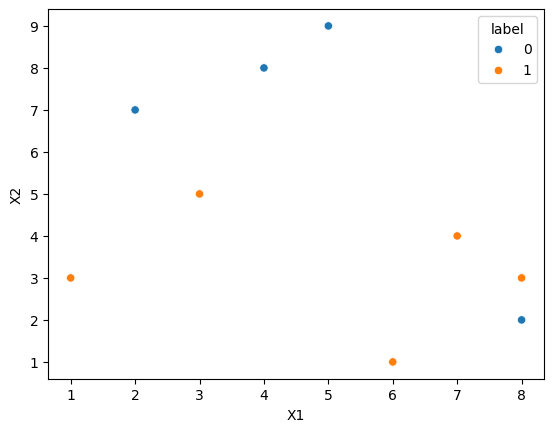

In [17]:
import seaborn as sns
sns.scatterplot(x= df['X1'] , y = df['X2'],hue = df['label'])

In [19]:
df['weights'] = 1/df.shape[0]

In [21]:
df

,X1,X2,label,weights
0,1,3,1,0.111111
1,2,7,0,0.111111
2,3,5,1,0.111111
3,4,8,0,0.111111
4,5,9,0,0.111111
5,6,1,1,0.111111
6,7,4,1,0.111111
7,8,2,0,0.111111
8,8,3,1,0.111111


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [67]:
x = df.iloc[:,:2].values
y = df.iloc[:,2].values

In [69]:
x

array([[1, 3],
       [2, 7],
       [3, 5],
       [4, 8],
       [5, 9],
       [6, 1],
       [7, 4],
       [8, 2],
       [8, 3]], dtype=int64)

In [71]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [73]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 6.0\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

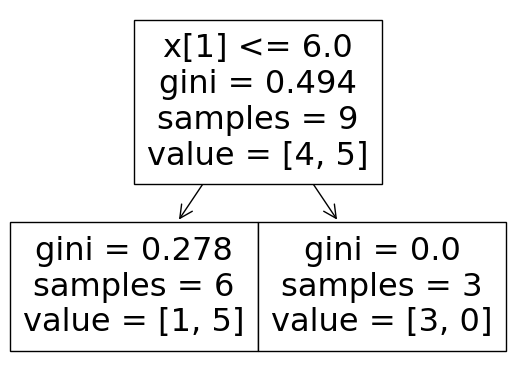

In [75]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

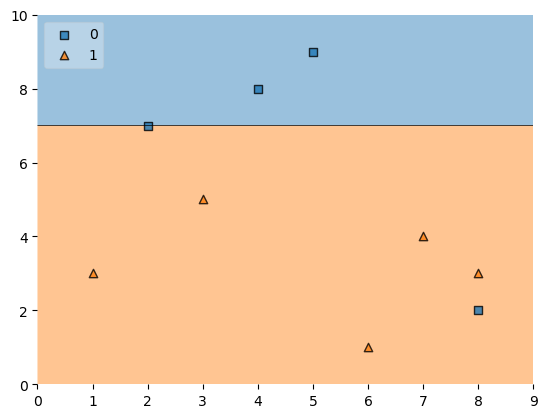

In [77]:
plot_decision_regions(x,y,clf=dt1,legend=2)

In [81]:
df['preds'] = dt1.predict(x)

In [83]:
df

,X1,X2,label,weights,preds
0,1,3,1,0.111111,1
1,2,7,0,0.111111,0
2,3,5,1,0.111111,1
3,4,8,0,0.111111,0
4,5,9,0,0.111111,0
5,6,1,1,0.111111,1
6,7,4,1,0.111111,1
7,8,2,0,0.111111,1
8,8,3,1,0.111111,1


In [201]:
def calculate_model_weight(error):
   return (0.5)*np.log((1-error)/error+0.000000000001)

In [97]:
# step 3 - calculate model weight
alpha1 = calculate_model_weight(0.111111)
alpha1

1.039721333340164

In [121]:
def update_row_weights(row,alpha=1.039721333340164):
    if row['label'] == row['preds']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)
        

In [123]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [125]:
df

,X1,X2,label,weights,preds,updated_weights
0,1,3,1,0.111111,1,0.039284
1,2,7,0,0.111111,0,0.039284
2,3,5,1,0.111111,1,0.039284
3,4,8,0,0.111111,0,0.039284
4,5,9,0,0.111111,0,0.039284
5,6,1,1,0.111111,1,0.039284
6,7,4,1,0.111111,1,0.039284
7,8,2,0,0.111111,1,0.314270
8,8,3,1,0.111111,1,0.039284


In [127]:
df['updated_weights'].sum()

0.6285393610548083

In [129]:
df['normalised_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [131]:
df

,X1,X2,label,weights,preds,updated_weights,normalised_weights
0,1,3,1,0.111111,1,0.039284,0.0625
1,2,7,0,0.111111,0,0.039284,0.0625
2,3,5,1,0.111111,1,0.039284,0.0625
3,4,8,0,0.111111,0,0.039284,0.0625
4,5,9,0,0.111111,0,0.039284,0.0625
5,6,1,1,0.111111,1,0.039284,0.0625
6,7,4,1,0.111111,1,0.039284,0.0625
7,8,2,0,0.111111,1,0.314270,0.5000
8,8,3,1,0.111111,1,0.039284,0.0625


In [137]:
df.normalised_weights.sum()

0.9999999999999999

In [139]:
df['cumsum_upper'] = np.cumsum(df['normalised_weights'])

In [141]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalised_weights']

In [143]:
df[['X1','X2','label','weights','preds','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,preds,updated_weights,cumsum_lower,cumsum_upper
0,1,3,1,0.111111,1,0.039284,0.0000,0.0625
1,2,7,0,0.111111,0,0.039284,0.0625,0.1250
2,3,5,1,0.111111,1,0.039284,0.1250,0.1875
3,4,8,0,0.111111,0,0.039284,0.1875,0.2500
4,5,9,0,0.111111,0,0.039284,0.2500,0.3125
5,6,1,1,0.111111,1,0.039284,0.3125,0.3750
6,7,4,1,0.111111,1,0.039284,0.3750,0.4375
7,8,2,0,0.111111,1,0.314270,0.4375,0.9375
8,8,3,1,0.111111,1,0.039284,0.9375,1.0000


In [149]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a>row['cumsum_lower']:
                indices.append(index)
    return indices

In [151]:
index_values = create_new_dataset(df)

index_values

[7, 7, 7, 3, 7, 8, 5, 7, 1]

In [153]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [155]:
second_df

,X1,X2,label,weights
7,8,2,0,0.111111
7,8,2,0,0.111111
7,8,2,0,0.111111
3,4,8,0,0.111111
7,8,2,0,0.111111
8,8,3,1,0.111111
5,6,1,1,0.111111
7,8,2,0,0.111111
1,2,7,0,0.111111


In [157]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [159]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [161]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 1.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]')]

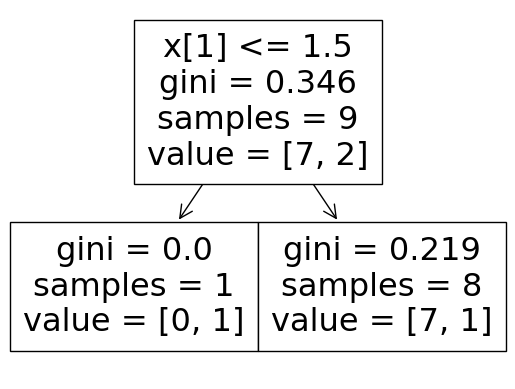

In [163]:
plot_tree(dt2)

<Axes: >

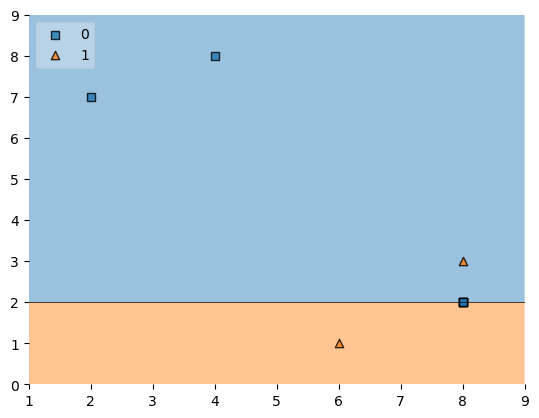

In [171]:
plot_decision_regions(X , y , clf = dt2 , legend=2)

In [173]:
second_df['preds'] = dt2.predict(X)

In [175]:
second_df

,X1,X2,label,weights,preds
7,8,2,0,0.111111,0
7,8,2,0,0.111111,0
7,8,2,0,0.111111,0
3,4,8,0,0.111111,0
7,8,2,0,0.111111,0
8,8,3,1,0.111111,0
5,6,1,1,0.111111,1
7,8,2,0,0.111111,0
1,2,7,0,0.111111,0


In [179]:
alpha2 = calculate_model_weight(0.111111)
alpha2

1.039721333340164

In [181]:
def update_row_weights(row,alpha=1.039721333340164):
    if row['label'] == row['preds']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)
        

In [183]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [185]:
second_df['updated_weights'].sum()

0.6285393610548083

In [187]:
second_df['normalised_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [191]:
second_df.normalised_weights.sum()

0.9999999999999999

In [193]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalised_weights'])

In [195]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalised_weights']

In [197]:
second_df[['X1','X2','label','weights','preds','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,preds,updated_weights,cumsum_lower,cumsum_upper
7,8,2,0,0.111111,0,0.039284,0.0000,0.0625
7,8,2,0,0.111111,0,0.039284,0.0625,0.1250
7,8,2,0,0.111111,0,0.039284,0.1250,0.1875
3,4,8,0,0.111111,0,0.039284,0.1875,0.2500
7,8,2,0,0.111111,0,0.039284,0.2500,0.3125
8,8,3,1,0.111111,0,0.314270,0.3125,0.8125
5,6,1,1,0.111111,1,0.039284,0.8125,0.8750
7,8,2,0,0.111111,0,0.039284,0.8750,0.9375
1,2,7,0,0.111111,0,0.039284,0.9375,1.0000


In [199]:
index_values = create_new_dataset(df)

index_values

[7, 0, 6, 0, 7, 7, 3, 4, 7]

In [203]:
third_df = df.iloc[index_values,[0,1,2,3]]

In [205]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [207]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [209]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 1.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]')]

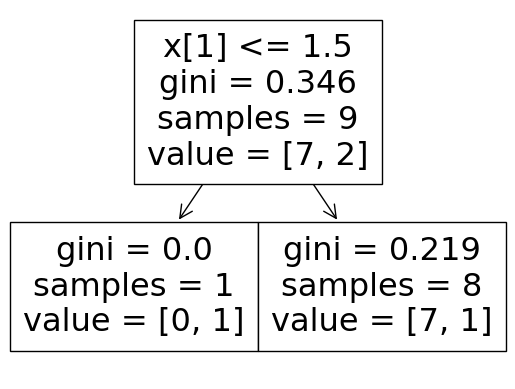

In [211]:
plot_tree(dt3)

<Axes: >

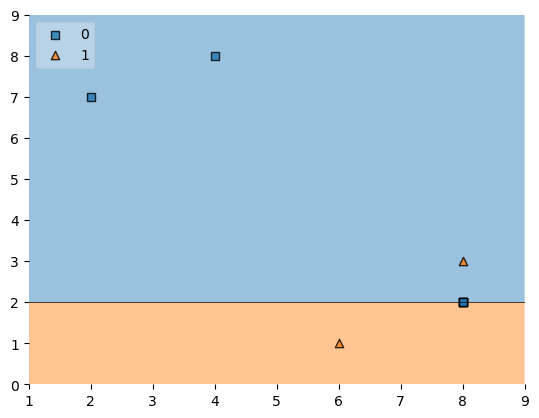

In [215]:
plot_decision_regions(X,y,clf=dt3,legend=2)

In [217]:
alpha3 = calculate_model_weight(0.111111)
alpha3

1.0397213333402264

In [223]:
query = np.array([3,5]).reshape(1,2)

In [225]:
dt1.predict(query)

array([1], dtype=int64)

In [227]:
dt2.predict(query)

array([0], dtype=int64)

In [229]:
dt3.predict(query)

array([0], dtype=int64)

In [231]:
alpha1*1 + alpha2*(-1) + alpha3*(-1)

-1.0397213333402264

In [233]:
np.sign(-1.0397)

-1.0